# A. Transformación de variables en relaciones no lineales

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [5]:
data_auto.shape

(406, 9)

In [6]:
# Mostrar la gráfica que relaciona las variables "horsepower" y "mpg"
# NOTA: el dataset contiene valores "NaN".
data_auto["horsepower"] = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
data_auto["mpg"] = data_auto["mpg"].fillna(data_auto["mpg"].mean())

Text(0.5, 1.0, 'HP vs MPG')

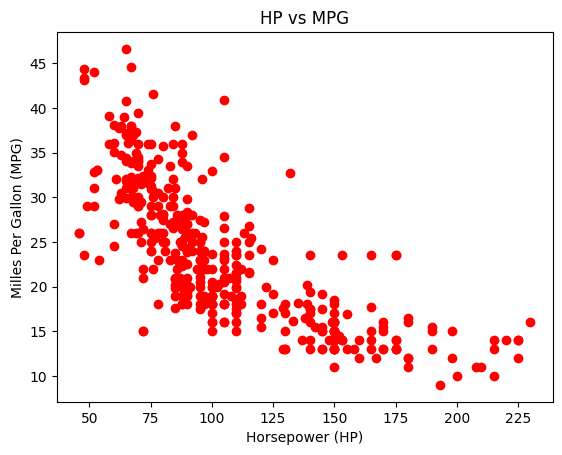

In [7]:
%matplotlib inline
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Milles Per Gallon (MPG)")
plt.title("HP vs MPG")

## A.1. Modelo de Regresión Lineal
### $mpg = \alpha + \beta*horsepower$ 

In [8]:
# Construyamos ahora un modelo de regresión lineal para las variables "horsepower" y "mpg"
X = data_auto["horsepower"]
Y = data_auto["mpg"]

In [33]:
X_data = X.values.reshape(-1, 1)
lm = LinearRegression()
lm.fit(X_data,Y)
Y_pred = lm.predict(X_data)

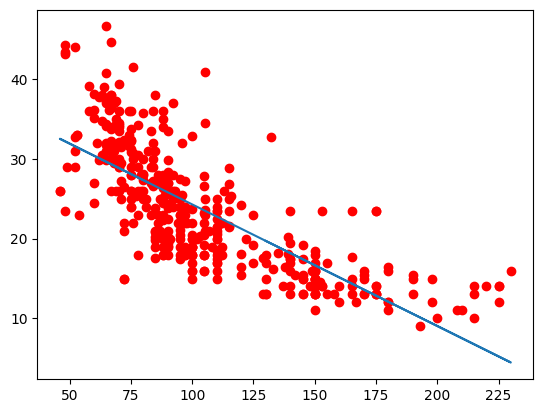

In [13]:
# Graficar las observaciones y el modelo de regresión
plt.plot(X,Y,"ro")
plt.plot(X,Y_pred)

In [14]:
# Obtener el valor del coeficiente de determinación (R^2)
lm.score(X_data,Y)

0.5746533406450252

In [15]:
# Calcular SSD y RSE
SSD = np.sum((Y-Y_pred)**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
# Calcular RSE_%
y_mean = np.mean(Y)
RSE_rate = RSE/y_mean
print("SSD = ",SSD)
print("RSE = ",RSE)
print("RSE_% = ",RSE_rate)

SSD =  10315.751960060918
RSE =  5.046879480825511
RSE_% =  0.21462773361633472


## A.2. Modelo de Regresión Cuadrática
### $mpg = \alpha + \beta_1*horsepower+\beta_2*horsepower^2$
### $mpg = \beta_0*horsepower^0 + \beta_1*horsepower^1+\beta_2*horsepower^2$
### $mpg = \alpha + \beta_1*x_1+\beta_2*x_2$
### $mpg = \beta_0*x_0 + \beta_1*x_1+\beta_2*x_2$, $x_0=1$

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# Invocar la función "PolynomialFeatures(degree=n)"
poly = PolynomialFeatures(degree=2)
# Transformar los datos para que cumplan con una relación polinomial de grado "n=2"
X_data = poly.fit_transform(X.values.reshape(-1, 1))
X_df = pd.DataFrame(X_data);
X_df

,0,1,2
0,1.0,130.0,16900.0
1,1.0,165.0,27225.0
2,1.0,150.0,22500.0
3,1.0,150.0,22500.0
4,1.0,140.0,19600.0
...,...,...,...
401,1.0,86.0,7396.0
402,1.0,52.0,2704.0
403,1.0,84.0,7056.0
404,1.0,79.0,6241.0


In [23]:
data_auto["horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
401     86.0
402     52.0
403     84.0
404     79.0
405     82.0
Name: horsepower, Length: 406, dtype: float64

In [24]:
# Generar el modelo de regresión
lm = LinearRegression()
lm.fit(X_data,Y)
Y_pred = lm.predict(X_data)

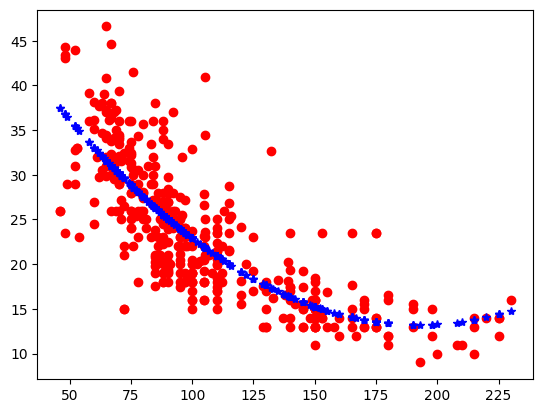

In [25]:
# Graficar las observaciones y el modelo de regresión
plt.plot(X,Y,"ro")
plt.plot(X,Y_pred,"b*")

In [26]:
# Obtener el valor del coeficiente de determinación (R^2)
lm.score(X_data,Y)

0.6439066584257469

In [27]:
# Calcular SSD y RSE
SSD = np.sum((Y-Y_pred)**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
# Calcular RSE_%
y_mean = np.mean(Y)
RSE_rate = RSE/y_mean
print("SSD = ",SSD)
print("RSE = ",RSE)
print("RSE_% = ",RSE_rate)

SSD =  8636.180643524502
RSE =  4.61778115803654
RSE_% =  0.196379546619069


In [28]:
# Obtener los parámetros del modelo.
alpha = lm.intercept_
beta_i = lm.coef_
print("alpha = ",alpha)
print("beta_i = ",beta_i)

alpha =  55.02619244708035
beta_i =  [ 0.         -0.43404318  0.00112615]


## A.3. Modelo de Regresión de Grado "n"

In [30]:
# Finalmente, veamos que desepeño tendriamos con 
def regression_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y-Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    RSE_rate = RSE/y_mean
    print("SSD = ",SSD)
    print("RSE = ",RSE)
    print("RSE_% = ",RSE_rate)
    return

for d in range (2,7):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X.values.reshape(-1, 1))
    lm = LinearRegression()
    lm.fit(X_data,Y)
    print("Regresión de grado "+str(d))
    print("R^2 = ", lm.score(X_data,Y))
    print("alpha = ", lm.intercept_)
    print("beta_i = ", lm.coef_)
    regression_validation(X_data, Y, lm.predict(X_data))
    print("\n")

Regresión de grado 2
R^2 =  0.6439066584257469
alpha =  55.02619244708035
beta_i =  [ 0.         -0.43404318  0.00112615]
SSD =  8636.180643524502
RSE =  4.61778115803654
RSE_% =  0.196379546619069


Regresión de grado 3
R^2 =  0.6444678885560744
alpha =  58.44877411191826
beta_i =  [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD =  8622.56936742855
RSE =  4.614140736300908
RSE_% =  0.19622473106036686


Regresión de grado 4
R^2 =  0.6467674189704502
alpha =  40.096643845355686
beta_i =  [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD =  8566.799832491353
RSE =  4.5991947315797574
RSE_% =  0.1955891250126879


Regresión de grado 5
R^2 =  0.6547512491912146
alpha =  -40.693943025915715
beta_i =  [ 0.00000000e+00  4.00021712e+00 -7.54802284e-02  6.19621564e-04
 -2.36220968e-06  3.41983068e-09]
SSD =  8373.171387463619
RSE =  4.546921733766328
RSE_% =  0.19336612066066147


Regresión de grado 6
R^2 =  0.6515211662513273
alpha = 